# AQI Prediction for Indian Cities
**Team Members:** [Your Names Here]
**Date:** September 8, 2025  
**Description:** This notebook builds a Random Forest regression model to predict daily AQI from pollutant and month data using Indian air quality dataset.


## 1. Data Loading
Load the CSV file and examine basic structure.


In [8]:
import pandas as pd
import numpy as np

# Load the CSV data file
df = pd.read_csv('city_day.csv')

print("✅ Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())


✅ Data loaded successfully!
Dataset shape: (29531, 16)
Columns: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

First 5 rows:
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    

## 2. Data Cleaning & Feature Engineering
Drop missing values, convert dates, and extract month.


In [9]:
# 1. Drop rows with any missing values
df_clean = df.dropna().copy()

# 2. Convert 'Date' to datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')

# 3. Extract month from the converted dates
df_clean['Month'] = df_clean['Date'].dt.month

# 4. Define features and target columns
feature_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Month']
target_col = 'AQI'

# 5. Prepare feature matrix X and target vector y
X = df_clean[feature_cols]
y = df_clean[target_col]

# 6. Confirm everything worked
print("✅ Data cleaned and features prepared!")
print(f"Features shape (X): {X.shape}")
print(f"Target shape (y):   {y.shape}")
print(f"Month values range: {df_clean['Month'].min()} to {df_clean['Month'].max()}")
print("\nFeature columns used:")
print(feature_cols)


✅ Data cleaned and features prepared!
Features shape (X): (6236, 10)
Target shape (y):   (6236,)
Month values range: 1 to 12

Feature columns used:
['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Month']


## 3. Model Training
Split data and train Random Forest regressor.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

print("✅ Model training complete!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples:  {X_test.shape[0]}")


✅ Model training complete!
Training samples: 4988
Testing samples:  1248


## 4. Model Evaluation
Compute MAE and R² on the test set.


In [11]:
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Predict on test data
y_pred = model.predict(X_test)

# 2. Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 3. Print results
print("✅ Model evaluation metrics:")
print(f"   Mean Absolute Error (MAE): {mae:.2f}")
print(f"   R² Score:                 {r2:.3f}")


✅ Model evaluation metrics:
   Mean Absolute Error (MAE): 13.91
   R² Score:                 0.949


## 5. Feature Importance
Plot and interpret feature importance to understand which pollutants most influence AQI.


Feature importances:
  Feature  Importance
0   PM2.5    0.830033
1    PM10    0.112539
6      CO    0.016378
8      O3    0.010535
5     NH3    0.008142
2      NO    0.005723
4     NOx    0.005570
3     NO2    0.004858
7     SO2    0.004213
9   Month    0.002008


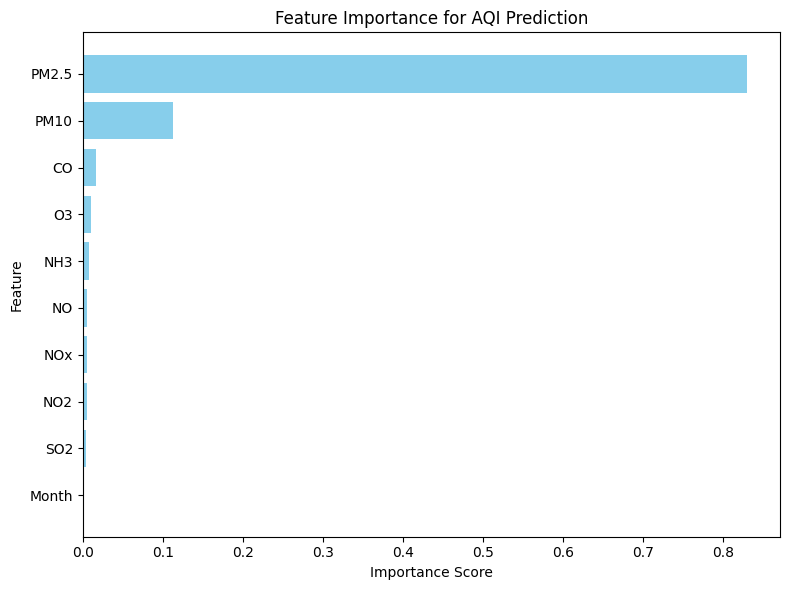

In [12]:
import matplotlib.pyplot as plt

# Prepare feature importance DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=True)

# Display the table
print("Feature importances:")
print(feat_imp.sort_values(by='Importance', ascending=False))

# Plot horizontal bar chart
plt.figure(figsize=(8,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='skyblue')
plt.title('Feature Importance for AQI Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## 6. Actual vs Predicted AQI
Visualize prediction accuracy with scatter plot. Points closer to red line indicate better predictions.


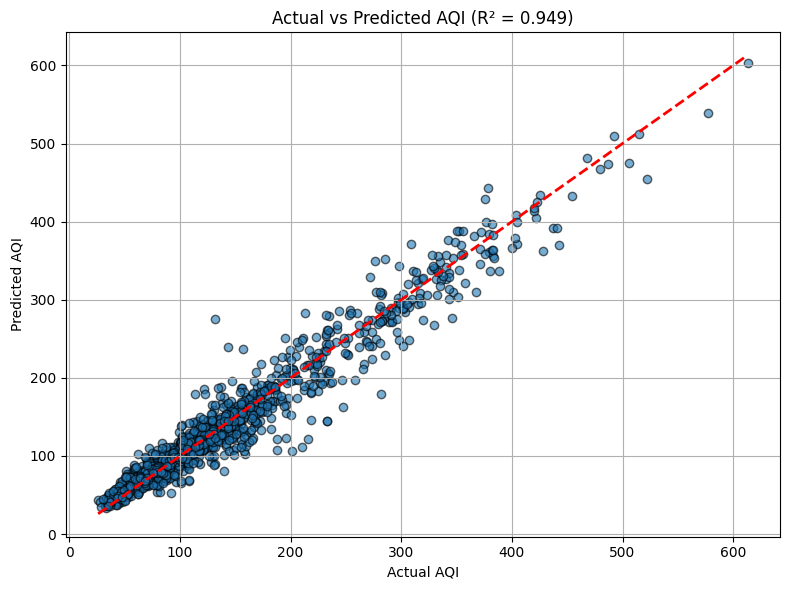

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title(f'Actual vs Predicted AQI (R² = {r2:.3f})')
plt.grid(True)
plt.tight_layout()
plt.show()


## 7. Prediction Function
Define a function to predict AQI for new pollutant readings.


In [14]:
def predict_aqi(pm25, pm10, no, no2, nox, nh3, co, so2, o3, month):
    """
    Predict AQI given pollutant values and month.
    Returns the predicted AQI rounded to 1 decimal place.
    """
    # Create DataFrame with correct feature names
    input_df = pd.DataFrame([{
        'PM2.5': pm25,
        'PM10': pm10,
        'NO': no,
        'NO2': no2,
        'NOx': nox,
        'NH3': nh3,
        'CO': co,
        'SO2': so2,
        'O3': o3,
        'Month': month
    }])
    
    prediction = model.predict(input_df)[0]
    return round(prediction, 1)

# Example usage
example_pred = predict_aqi(50, 100, 10, 40, 20, 15, 1.0, 5, 30, 7)
print(f"Example predicted AQI for given pollutant levels: {example_pred}")

# Test with different values
print(f"High pollution scenario: {predict_aqi(150, 300, 50, 80, 60, 40, 3.0, 20, 10, 12)}")
print(f"Low pollution scenario: {predict_aqi(20, 40, 5, 15, 10, 5, 0.5, 2, 50, 6)}")


Example predicted AQI for given pollutant levels: 105.7
High pollution scenario: 311.9
Low pollution scenario: 82.4
